# SALARY DATASET ANALYLSIS

##### **Domain**: Human Resources (HR) 

##### **Objective**: 
To analyse salary pattern of different companies, for different job roles, for different skillset, for different employment status and in differnt geographical location. 

##### **Business Problem Statement**: 
Companies need to analyze real-world salary data across roles, employment types, and locations to design fair, competitive compensation strategies that attract and retain talent.

##### **Dataset**: 
The dataset consists of 22,000+ records across 8 attributes, making it suitable for Exploratory Data Analysis(EDA), data cleaning, visualization and business insights generate using Python.

## Step 1: Data Loading and Initial Overview 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.float_format', '{:.2f}'.format) 
plt.style.use("default")
sns.set_context("notebook")


### Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\DHANYA\Downloads\Salary Dataset.zip")
print("Dataset loaded successfully")

Dataset loaded successfully


In [78]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.80,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.50,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.00,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.80,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.40,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.70,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.00,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.10,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.10,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [8]:
df.shape

(22770, 8)

### Top Records Overview

In [9]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


### Bottom Records Overview

In [10]:
df.tail()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web
22769,3.8,Thomson Reuters,Associate Web Developer,300000,7,Bangalore,Full Time,Web


### Column Information 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


### Statistical Summary of Numerical Columns

In [12]:
df.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


### Statistical Summary of Categorical Column

In [14]:
df.describe(include='object')

,Company Name,Job Title,Location,Employment Status,Job Roles
count,22769,22770,22770,22770,22770
unique,11260,1080,10,4,11
top,Tata Consultancy Services,Software Development Engineer,Bangalore,Full Time,SDE
freq,271,2351,8264,20083,8183


## Step 2: Data Preprocessing 

#### Handling Missing Values

In [3]:
df.isnull().sum()

Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [4]:
df["Company Name"]=df["Company Name"].fillna("Unknown")

In [5]:
df.isnull().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

###  Handling Duplicates

In [20]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22765    False
22766    False
22767    False
22768    False
22769    False
Length: 22770, dtype: bool

In [23]:
df.duplicated().sum()

np.int64(0)

### Outlier Detection & Removal

####  Visualize Salary Outliers

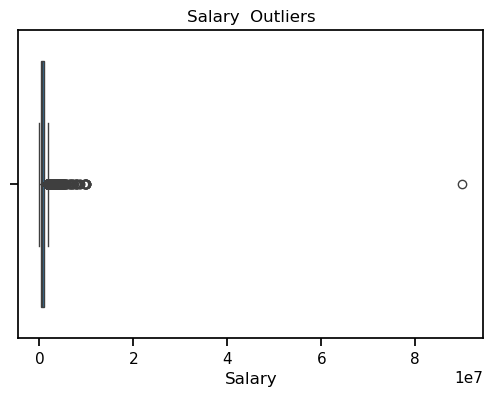

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Salary"])
plt.title("Salary  Outliers")
plt.show()

#### Interquartile Range (IQR) Method

In [7]:
Q1 = df["Salary"].quantile(0.25) #calculates the 25th percentile 
                                   #of the Salary column.


Q3 = df["Salary"].quantile(0.75) #  calculates the 75th percentile 
                                    #of the Salary column.


IQR = Q3-Q1

In [8]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [9]:
df= df[(df["Salary"]>=lower_limit)&(df["Salary"]<=upper_limit)]

In [40]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


### Checking Outliers Presence

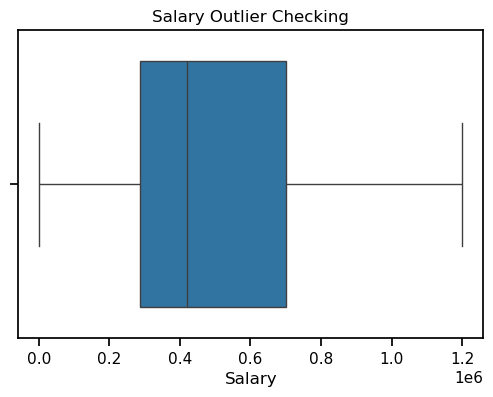

In [66]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Salary"])
plt.title("Salary Outlier Checking")
plt.show()
          

##### This proved now there is no outlier presence in the salary distribution.

## Step 3: Exploratory Data Analysis (EDA) and Visualization

### Key Questions to Answer
1. What does the salary distribution look like?
2. What job role has the highest average salary?
3. Which cities offer the highest average salary?
4. Name those 5 companies located in "Mumbai" with Ratings of '5', offering highest and lowest salaries.
5. Which Job Title has the highest number of salary reported?
6. Top 5 companies which provide the highest average salary, with salaries reported more than 20 times?
7. Is there any relationship between company rating and salary?
8. Does employment status effect salary?
9. Which job roles are most common?

#### 1. Salary Distribution Using Histogram

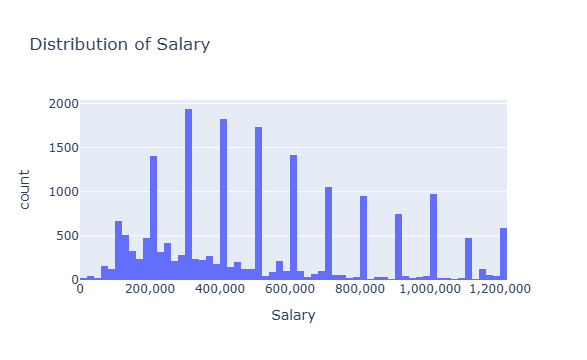

In [52]:
fig =px.histogram(df['Salary'], x="Salary", title="Distribution of Salary")
fig.update_xaxes(tickformat=",.0f")
fig.show()

##### Insight:
- The salary distribution shows most of the employees earn between 2 lakhs to 6 lakhs where 3 lakhs being the most common salary level.
- This means here salaries are concentrated in the lower to mid-range only.
- Overall, the distribution is right-skewed. It means many people earn lower salaries while fewer people earns high salaries.

#### 2. Highest Average Salary Across Role

In [79]:
df['Job Roles'].nunique()

11

In [80]:
df['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [81]:
top_paying_role =df.groupby('Job Roles')['Salary'].mean().sort_values(ascending=False)
print(top_paying_role .head(10))

Job Roles
Database   958584.05
Mobile     882282.97
SDE        853794.52
Backend    748518.16
IOS        695254.25
Frontend   610098.70
Android    565911.00
Java       564709.91
Testing    496298.19
Python     486022.79
Name: Salary, dtype: float64


##### Insight:
- High salary is provided for specialized roles such as Database,SDE,IOS & Mobile due to scarcity of expertise.
- Low salary is provided for general development roles such as Java, Android, Python due to high supply of employees.
- This means avaibility of supply of employees have huge impact on salary distribution. 

### 3. Top Pay Cities 

In [82]:
 top_pay_cites = df.groupby('Location')['Salary'].mean().sort_values(ascending=False)
print(top_pay_cites)

Location
Mumbai           961180.37
Bangalore        735344.74
Kolkata          710925.57
Pune             690476.31
Hyderabad        679099.16
Madhya Pradesh   677641.91
New Delhi        658756.74
Jaipur           629135.80
Chennai          584559.66
Kerala           553577.48
Name: Salary, dtype: float64


##### Insight:
- High salary is provided in metropolitan cities such as Mumbai, Bangalore , Pune, Hyderabad.
- Tier 2 cities including Kerala, Chennai, Jaipur provide the lowest pay.

### 4. Mumbai 5-Star Companies: Salary Range

In [99]:
 mumbai = df[(df['Location'] == 'Mumbai') & (df['Rating'] == 5)].sort_values(by='Salary', ascending=False)


In [109]:
# Highest 5

print(mumbai.head(5)[['Company Name','Employment Status','Job Roles','Salary']])

                     Company Name Employment Status Job Roles   Salary
16612                      DreamX         Full Time       SDE  1600000
16805              Sansam Systems         Full Time       SDE  1500000
16986                         BBJ         Full Time       SDE  1000000
16938                Pools of Fun         Full Time       SDE   800000
16950  J.E. Thomas and Associates         Full Time       SDE   800000


In [110]:
# Lowest 5

print(mumbai.tail(5)[['Company Name','Employment Status','Job Roles','Salary']])

                            Company Name Employment Status Job Roles  Salary
16922                             SSTech         Full Time       SDE  500000
17010  Assurekit Technology and Services         Full Time       SDE  400000
16963            Great Manager Institute         Full Time       SDE  348000
16781       Usthaan Integrated Solutions            Intern       SDE  180000
16487                  Qualtel Solutions         Full Time       SDE  168000


### 5. Top Reported Job Title

In [12]:
most_reported_job = df.groupby('Job Title')['Salaries Reported'].count().sort_values(ascending=False)
print(most_reported_job.head())

Job Title
Software Development Engineer          2225
Android Developer                      1998
Software Development Engineer (SDE)    1528
Front End Developer                    1384
Test Engineer                          1301
Name: Salaries Reported, dtype: int64


### 6. Top 5 Companies by Salary & Frequency of Salary Reports (≥ 20 Entries)

In [19]:
 filter_df = df[df['Salaries Reported']>=20]

In [20]:
filter_df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
8790,3.90,Tata Consultancy Services,Java Developer,200000,30,Chennai,Full Time,Java
8977,3.80,Cognizant Technology Solutions,Senior Java Developer,200000,35,Chennai,Full Time,Java
8978,3.90,Tata Consultancy Services,Senior Java Developer,300000,30,Chennai,Full Time,Java
8979,3.90,Tata Consultancy Services,Junior Java Developer,200000,30,Chennai,Full Time,Java
9688,3.90,Tata Consultancy Services,Java Developer,200000,43,Hyderabad,Full Time,Java
...,...,...,...,...,...,...,...,...
21762,3.80,CGI,Senior Test Engineer,400000,21,Bangalore,Full Time,Testing
21763,4.10,IBM,Test Automation Engineer,400000,21,Bangalore,Full Time,Testing
21764,3.70,SLK Group,Software Test Engineer,300000,20,Bangalore,Full Time,SDE
21765,4.30,Cisco Systems,Software Test Engineer,700000,20,Bangalore,Full Time,SDE


In [33]:
top_reported_companies = filter_df.groupby('Company Name')['Salary'].mean().sort_values(ascending=False)
print( top_reported_companies.head())

Company Name
Expedia Group    1350000.00
Cisco Systems    1250000.00
Amadeus          1200000.00
Nokia            1200000.00
Alcatel-Lucent   1000000.00
Name: Salary, dtype: float64


##### Insights:
- Expedia Group offers the highest average salary, followed by Cisco Systems, Amadeus, Nokia and Alcatel-Lucent in a competitive range .
- Overall, technology and telecom companies dominate the top-paying positions, highlighting industry trends in compensation.

### 7. Correlation Analysis: Ratings v/s Salaries

In [10]:
# Calculate correlation 

correlation = df['Rating'].corr(df['Salary']) 
print("Correlation between Rating and Salary:", correlation)

Correlation between Rating and Salary: 0.028435446014226973


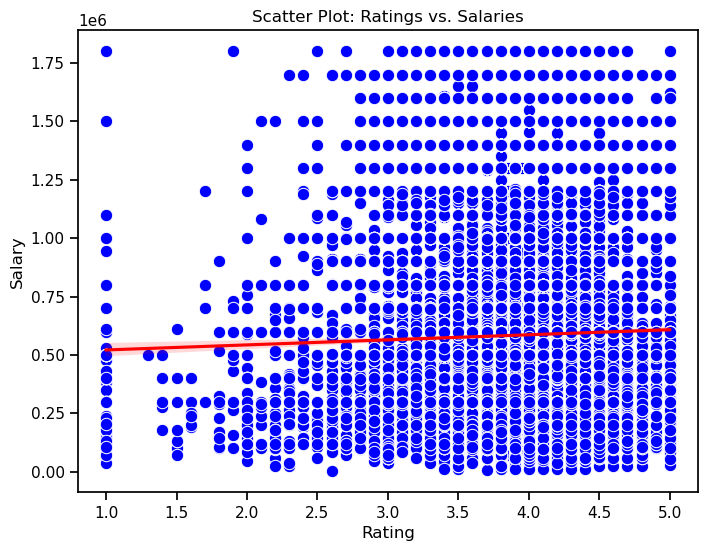

In [11]:
# Scatter plot with regression line

plt.figure(figsize=(8,6)) 
sns.scatterplot(x='Rating', y='Salary', data=df, s=80, color='blue')
sns.regplot(x='Rating', y='Salary', data=df, scatter=False, color='red') # regression line 
plt.title('Scatter Plot: Ratings vs. Salaries') 
plt.xlabel('Rating') 
plt.ylabel('Salary') 
plt.show()

##### Insights:
- The red line is linear regression line.
- Since the linear regression line is flat → ratings and salaries have less relationship.

### 8. Relationship between Employment Status and Salary

In [15]:
emply_status = df['Employment Status'].unique()
print("Different Employment Status:", emply_status)

Different Employment Status: ['Full Time' 'Intern' 'Contractor' 'Trainee']


In [16]:
count_of_emply_status = df['Employment Status'].value_counts()
print(count_of_emply_status )

Employment Status
Full Time     18966
Intern         2092
Contractor      523
Trainee          33
Name: count, dtype: int64


In [19]:
df.groupby('Employment Status')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Employment Status,,,,,,,,
Contractor,523.00,523849.70,351437.18,12000.00,300000.00,408000.00,678000.00,1800000.00
Full Time,18966.00,613544.65,401432.27,8448.00,300000.00,500000.00,876000.00,1800000.00
Intern,2092.00,340258.84,268760.07,2112.00,144000.00,276000.00,456000.00,1800000.00
Trainee,33.00,324303.03,241096.52,96000.00,144000.00,240000.00,400000.00,1100000.00


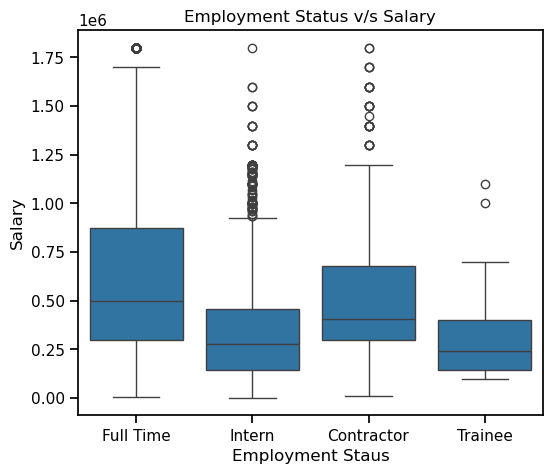

In [21]:
# Analysis with Box plot

plt.figure(figsize=(6,5))
sns.boxplot(x="Employment Status",  y="Salary", data=df)
plt.title("Employment Status v/s Salary")
plt.xlabel("Employment Staus")
plt.ylabel("Salary")
plt.show()      

##### Insights:
-  Full Time employees earn the highest salary.
-  Followed by contractors and interns.
-  However, trainees earn the least.
-  Also, the outliers in the diagram shows that in every employment status exceptional cases exist.

### 9. Most Common Job Role Using Bar Chart

In [32]:
job_counts =df['Job Roles'].value_counts().head()
print(job_counts)

Job Roles
SDE         7573
Android     2856
Frontend    2088
Java        1805
Testing     1723
Name: count, dtype: int64


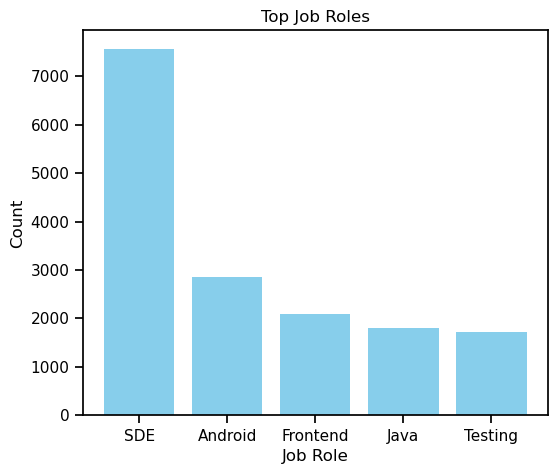

In [34]:
# Analyse with Bar Chart

plt.figure(figsize=(6,5))
plt.bar(job_counts.index,job_counts.values,color='skyblue')
plt.title("Top Job Roles")
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.show()

## Step 4: Insight Generation and Report

#### Findings:
1. **Salary Distribution**
- Observation: Most employees earn between **2–6 lakhs**, with **3 lakhs** being the most common salary level.
- Pattern: Salaries are concentrated in the **lower to mid-range**.
- Anomaly: The distribution is right-skewed → **many** employees earn **lower salaries**, while **fewer** earn very** high salaries**.

2. **Role-Based Salary Insights**
- **High-paying** roles: Specialized positions such as Database, SDE, iOS & Mobile due to **scarcity of expertise**.
- **Low-paying** roles: General development roles like Java, Android, Python because of **high supply of employees**.
- Interpretation: **Supply-demand** dynamics strongly **influence salary distribution**. Also **upskilling** is signififcant to secure higher-paying jobs.

3. **Location-Based Salary Insights**
- **Metropolitan cities** (Mumbai, Bangalore, Pune, Hyderabad) → **higher salaries**.
- **Tier-2 cities** (Kerala, Chennai, Jaipur) → **lower salaries**.
- Interpretation: Geographic location plays a significant role in compensation, with metros offering premium pay.

4. **Top Reported Job Titles**
Insight: **Development and testing roles** dominate the dataset, reflecting industry demand.

5. **Company-Based Salary Insights**
- Highest average salary: Expedia Group
- Other top-paying companies: Cisco Systems, Amadeus, Nokia, Alcatel-Lucent
- Trend: **Technology and telecom companies** dominate high-paying positions.

6. **Correlation Analysis – Ratings vs. Salaries**
- Scatter plot with regression line shows a flat trend.
- Insight: Ratings and salaries **have little to no correlation**.
- Interpretation: **Company reputation (rating) does not strongly influence salary levels**.
  
7. **Employment Status Insights**
- Full-time employees earn the highest salaries.
- Contractors, interns, and trainees earn less due to temporary or entry-level status.
- Conclusion: **Upskilling** helps employees transition into **full-time roles**, which are associated with **higher salaries**.

8. **Most Common Job Roles**
- Insight: SDE roles are the most common, followed by Android and Frontend development.


#### Summary:

- **Salaries are concentrated in the lower-mid range**, with specialized roles and metro locations commanding higher pay.
- **Supply-demand dynamics** strongly affect compensation: scarce expertise → higher pay, abundant skills → lower pay. **Company ratings** do not significantly influence salary levels.
- **Employment type** matters: full-time roles consistently pay more.
- **Industry trend**: Technology and telecom companies dominate top-paying positions.

#### Recommendations:

- **For employees**: Focus on specialized skills (Database, SDE, iOS/Mobile) and metro opportunities for higher pay.
- **For companies**: Address pay disparities in tier-2 cities to attract talent.

## Step 5: Export as CSV 

##### Goal: To gain the cleaned salary dataset in the form of csv file from DataFrame

In [ ]:
df.to_csv("cleaned_salary_dataset.csv", index=False)